In [1]:
import pandas as pd
import matplotlib as plm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import median

# Cleaning e manipolazione dataset

In [2]:
df = pd.read_csv('compitino_dataviz_2021_2022.csv')
df

,nome_modulistica,score_preop,score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,SF12 PhysicalScore,27.60,37.40,poco nuvoloso,F,70,20.0,69.0,False,True
1,SF12 MentalScore,54.36,58.46,poco nuvoloso,F,70,20.0,69.0,False,True
2,SF12 PhysicalScore,28.15,38.25,poco nuvoloso,M,69,18.0,65.0,False,True
3,SF12 MentalScore,57.02,64.62,poco nuvoloso,M,69,18.0,65.0,False,True
4,SF12 PhysicalScore,31.57,55.67,poco nuvoloso,M,70,23.0,74.0,False,True
...,...,...,...,...,...,...,...,...,...,...
2105,SF12 MentalScore,57.54,62.34,nebbia al mattino,M,70,20.0,71.0,True,True
2106,SF12 PhysicalScore,32.20,37.10,nebbia al mattino,F,56,20.0,71.0,True,True
2107,SF12 MentalScore,48.84,50.94,nebbia al mattino,F,56,20.0,71.0,True,True
2108,SF12 PhysicalScore,36.47,43.47,sereno,M,69,23.0,55.0,False,True


In [3]:
physical = df[df['nome_modulistica'] == 'SF12 PhysicalScore'].reset_index()
physical = physical.rename(columns = {'score_preop':'physical_score_preop', 'score_postop':'physical_score_postop'})
physical

,index,nome_modulistica,physical_score_preop,physical_score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,0,SF12 PhysicalScore,27.60,37.40,poco nuvoloso,F,70,20.0,69.0,False,True
1,2,SF12 PhysicalScore,28.15,38.25,poco nuvoloso,M,69,18.0,65.0,False,True
2,4,SF12 PhysicalScore,31.57,55.67,poco nuvoloso,M,70,23.0,74.0,False,True
3,6,SF12 PhysicalScore,34.28,57.08,poco nuvoloso,F,66,15.0,72.0,False,True
4,8,SF12 PhysicalScore,27.43,29.13,nebbia al mattino,F,73,18.0,75.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1050,2100,SF12 PhysicalScore,28.78,45.18,poco nuvoloso,F,57,23.0,61.0,True,True
1051,2102,SF12 PhysicalScore,27.63,39.33,sereno,F,58,21.0,71.0,True,True
1052,2104,SF12 PhysicalScore,29.01,49.81,nebbia al mattino,M,70,20.0,71.0,True,True
1053,2106,SF12 PhysicalScore,32.20,37.10,nebbia al mattino,F,56,20.0,71.0,True,True


In [4]:
mental = df[df['nome_modulistica'] == 'SF12 MentalScore'].reset_index()
mental = mental.rename(columns = {'score_preop':'mental_score_preop', 'score_postop':'mental_score_postop'})
mental

,index,nome_modulistica,mental_score_preop,mental_score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,1,SF12 MentalScore,54.36,58.46,poco nuvoloso,F,70,20.0,69.0,False,True
1,3,SF12 MentalScore,57.02,64.62,poco nuvoloso,M,69,18.0,65.0,False,True
2,5,SF12 MentalScore,60.27,58.47,poco nuvoloso,M,70,23.0,74.0,False,True
3,7,SF12 MentalScore,50.17,54.97,poco nuvoloso,F,66,15.0,72.0,False,True
4,9,SF12 MentalScore,54.14,55.74,nebbia al mattino,F,73,18.0,75.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1050,2101,SF12 MentalScore,37.40,34.50,poco nuvoloso,F,57,23.0,61.0,True,True
1051,2103,SF12 MentalScore,33.93,59.13,sereno,F,58,21.0,71.0,True,True
1052,2105,SF12 MentalScore,57.54,62.34,nebbia al mattino,M,70,20.0,71.0,True,True
1053,2107,SF12 MentalScore,48.84,50.94,nebbia al mattino,F,56,20.0,71.0,True,True


In [5]:
df1 = pd.concat([physical, mental[['mental_score_preop', 'mental_score_postop']]], axis = 1)
df1

,index,nome_modulistica,physical_score_preop,physical_score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light,mental_score_preop,mental_score_postop
0,0,SF12 PhysicalScore,27.60,37.40,poco nuvoloso,F,70,20.0,69.0,False,True,54.36,58.46
1,2,SF12 PhysicalScore,28.15,38.25,poco nuvoloso,M,69,18.0,65.0,False,True,57.02,64.62
2,4,SF12 PhysicalScore,31.57,55.67,poco nuvoloso,M,70,23.0,74.0,False,True,60.27,58.47
3,6,SF12 PhysicalScore,34.28,57.08,poco nuvoloso,F,66,15.0,72.0,False,True,50.17,54.97
4,8,SF12 PhysicalScore,27.43,29.13,nebbia al mattino,F,73,18.0,75.0,False,True,54.14,55.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,2100,SF12 PhysicalScore,28.78,45.18,poco nuvoloso,F,57,23.0,61.0,True,True,37.40,34.50
1051,2102,SF12 PhysicalScore,27.63,39.33,sereno,F,58,21.0,71.0,True,True,33.93,59.13
1052,2104,SF12 PhysicalScore,29.01,49.81,nebbia al mattino,M,70,20.0,71.0,True,True,57.54,62.34
1053,2106,SF12 PhysicalScore,32.20,37.10,nebbia al mattino,F,56,20.0,71.0,True,True,48.84,50.94


In [6]:
df1.drop('index', axis = 1, inplace = True)
df1.drop('nome_modulistica', axis = 1, inplace = True)

In [7]:
columns_names = ['physical_score_preop',
 'physical_score_postop', 
 'mental_score_preop',
 'mental_score_postop',
 'condizioni_meteo',
 'sesso',
 'anni_ricovero',
 'temperatura_media',
 'umidita_media',
 'HI > 27',
 'natural_light']
df1 = df1.reindex(columns=columns_names)
df1.head()

,physical_score_preop,physical_score_postop,mental_score_preop,mental_score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,27.60,37.40,54.36,58.46,poco nuvoloso,F,70,20.0,69.0,False,True
1,28.15,38.25,57.02,64.62,poco nuvoloso,M,69,18.0,65.0,False,True
2,31.57,55.67,60.27,58.47,poco nuvoloso,M,70,23.0,74.0,False,True
3,34.28,57.08,50.17,54.97,poco nuvoloso,F,66,15.0,72.0,False,True
4,27.43,29.13,54.14,55.74,nebbia al mattino,F,73,18.0,75.0,False,True


Genero due nuove colonne contenti le differenze tra gli score post e pre operazione

In [8]:
physical_score_diff = df1['physical_score_postop'] - df1['physical_score_preop']
mental_score_diff = df1['mental_score_postop'] - df1['mental_score_preop']
df1.insert(2,"physical_score_diff", physical_score_diff)
df1.insert(5,"mental_score_diff", mental_score_diff)

Converto le colonne delle variabili categoriche da stringhe a fattori:

In [9]:
df1['condizioni_meteo'] = df1['condizioni_meteo'].astype("category")
df1['sesso'] = df1['sesso'].astype("category")

Salvataggio datasets

In [12]:
df1.to_csv('dataset_normalizzato_con_differenze.csv', index = False)
df[df['nome_modulistica'] == 'SF12 MentalScore'].to_csv('mental_score_dataset.csv', index = False)
df[df['nome_modulistica'] == 'SF12 PhysicalScore'].to_csv('physical_score_dataset.csv', index = False)
df1.head()

,physical_score_preop,physical_score_postop,physical_score_diff,mental_score_preop,mental_score_postop,mental_score_diff,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,27.60,37.40,9.8,54.36,58.46,4.1,poco nuvoloso,F,70,20.0,69.0,False,True
1,28.15,38.25,10.1,57.02,64.62,7.6,poco nuvoloso,M,69,18.0,65.0,False,True
2,31.57,55.67,24.1,60.27,58.47,-1.8,poco nuvoloso,M,70,23.0,74.0,False,True
3,34.28,57.08,22.8,50.17,54.97,4.8,poco nuvoloso,F,66,15.0,72.0,False,True
4,27.43,29.13,1.7,54.14,55.74,1.6,nebbia al mattino,F,73,18.0,75.0,False,True


# Visualizzazioni

Valuto le correlazioni con un pairplot

In [11]:
#sns.pairplot(df1)

Valuto alcuni violin plot condizionati

<AxesSubplot:xlabel='sesso', ylabel='physical_score_postop'>

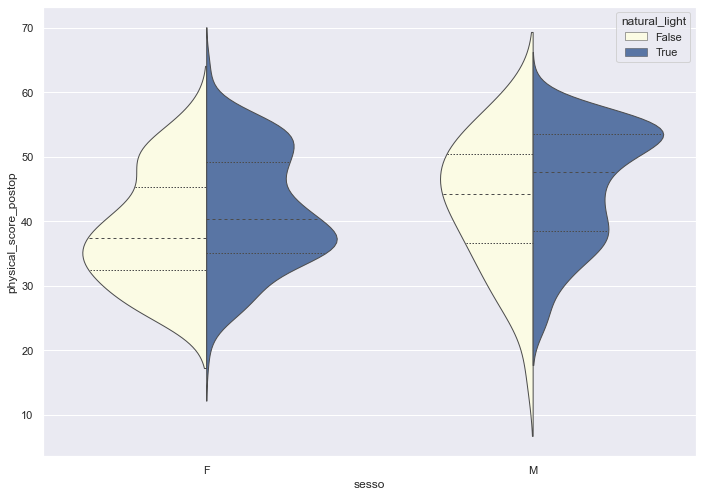

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=df1, x="sesso", y="physical_score_postop", hue="natural_light",
               split=True, inner="quart", linewidth=1, palette = {False:'lightyellow', True:'b'})

<AxesSubplot:xlabel='natural_light', ylabel='physical_score_postop'>

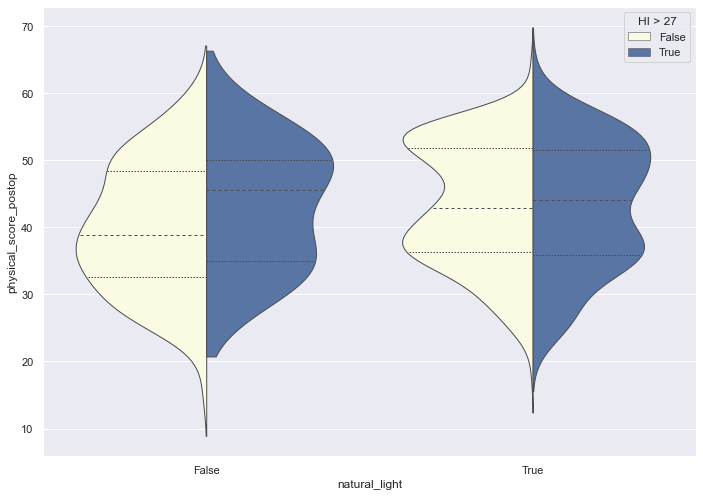

In [13]:
sns.violinplot(data=df1, x="natural_light", y="physical_score_postop", hue="HI > 27",
               split=True, inner="quart", linewidth=1, palette = {False:'lightyellow', True:'b'})

<AxesSubplot:xlabel='natural_light', ylabel='physical_score_postop'>

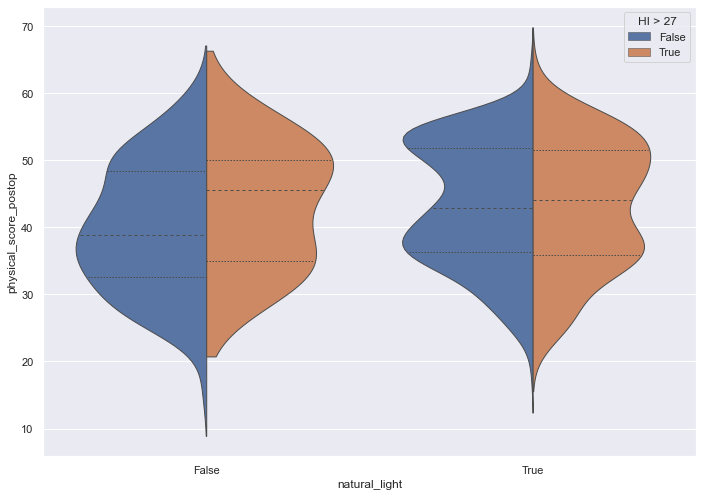

In [14]:
sns.violinplot(data=df1, x="natural_light", y="physical_score_postop", hue="HI > 27",
               split=True, inner="quart", linewidth=1)

<AxesSubplot:xlabel='HI > 27', ylabel='score_postop'>

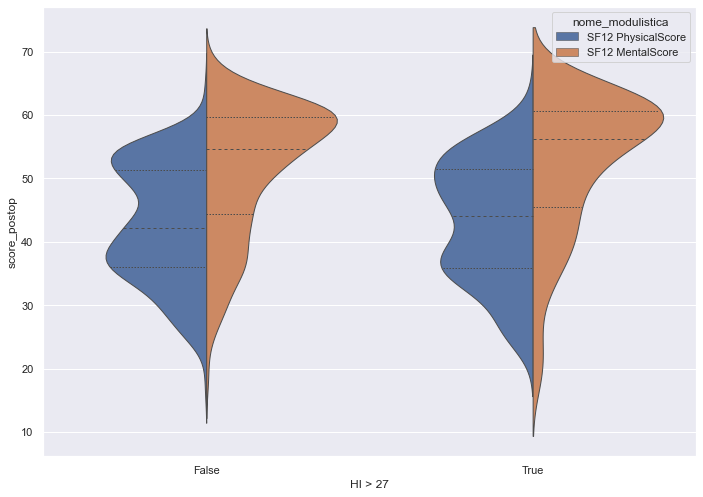

In [15]:
sns.violinplot(data=df, x="HI > 27", y="score_postop", hue="nome_modulistica",
               split=True, inner="quart", linewidth=1)

<AxesSubplot:xlabel='HI > 27', ylabel='score_preop'>

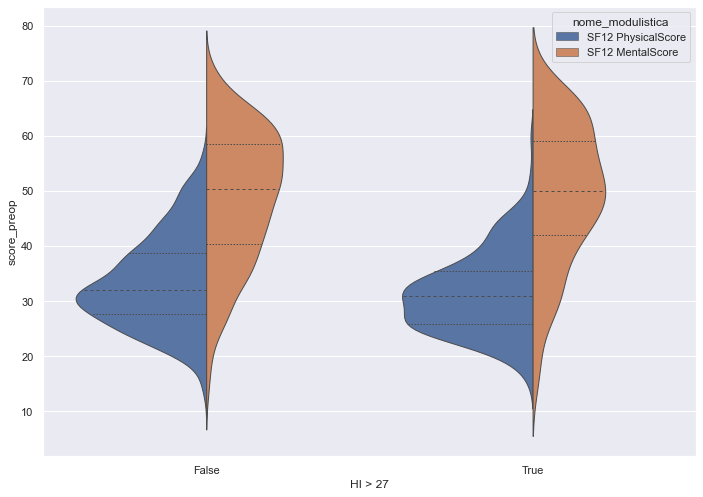

In [16]:
sns.violinplot(data=df, x="HI > 27", y="score_preop", hue="nome_modulistica",
               split=True, inner="quart", linewidth=1)

<AxesSubplot:xlabel='nome_modulistica', ylabel='score_preop'>

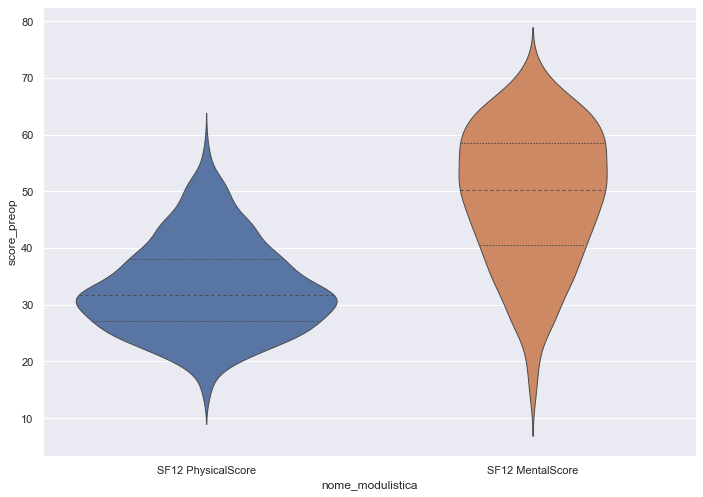

In [17]:
sns.violinplot(data=df, x="nome_modulistica", y="score_preop",
               split=True, inner="quart", linewidth=1)

<AxesSubplot:xlabel='nome_modulistica', ylabel='score_postop'>

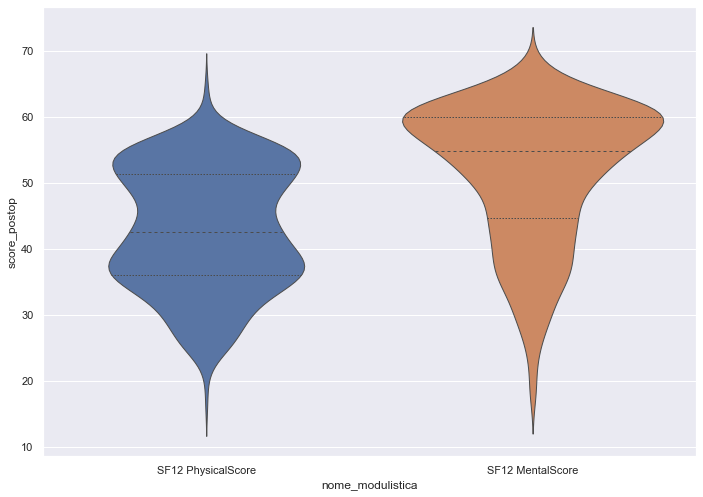

In [18]:
sns.violinplot(data=df, x="nome_modulistica", y="score_postop",
               split=True, inner="quart", linewidth=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'poco nuvoloso'),
  Text(1, 0, 'nebbia al mattino'),
  Text(2, 0, 'sereno'),
  Text(3, 0, 'pioggia e schiarite'),
  Text(4, 0, 'pioggia debole'),
  Text(5, 0, 'nubi sparse'),
  Text(6, 0, 'temporale e schiarite'),
  Text(7, 0, 'neve'),
  Text(8, 0, 'coperto'),
  Text(9, 0, 'neve e schiarite'),
  Text(10, 0, 'neve debole'),
  Text(11, 0, 'sole e caldo'),
  Text(12, 0, 'pioggia mista a neve e schiarite'),
  Text(13, 0, 'nebbia'),
  Text(14, 0, 'pioggia')])

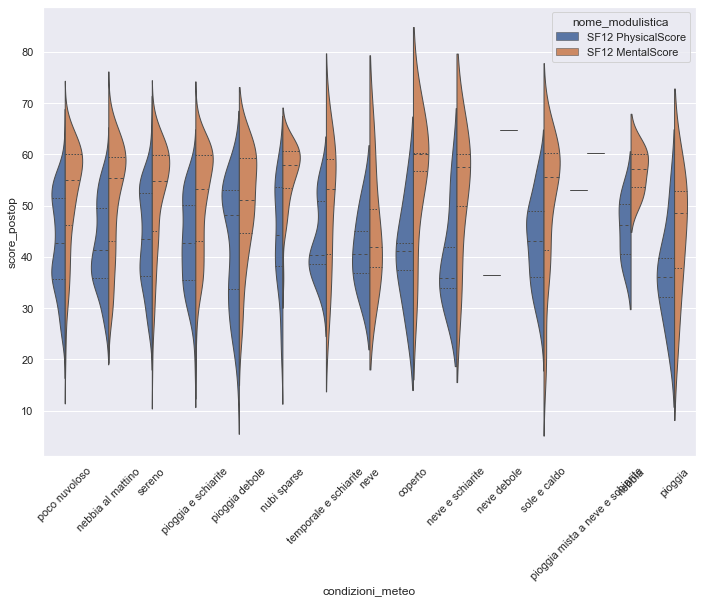

In [19]:
sns.violinplot(data=df, x="condizioni_meteo", y="score_postop", hue="nome_modulistica",
               split=True, inner="quart", linewidth=1)
plt.xticks(rotation=45)

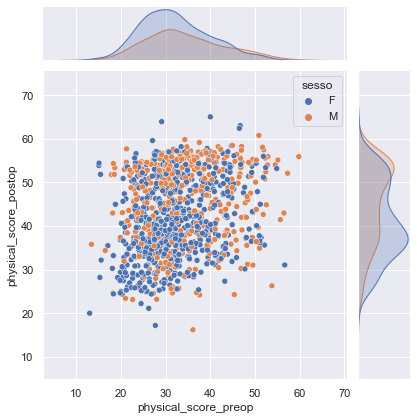

In [20]:
#physical pre/post op evidenziando il genere
#notiamo bimodalità nell genere femminile per quanto riguarda lo score post operatorio
sns.jointplot(data=df1, x="physical_score_preop", y="physical_score_postop", hue="sesso", )

In [21]:
#physical pre/post op evidenziando il genere
#notiamo bimodalità nell genere femminile per quanto riguarda lo score post operatorio
sns.jointplot(data=df1b, x="physical_score_diff", y="mental_score_diff", hue="HI > 27")

NameError: name 'df1b' is not defined

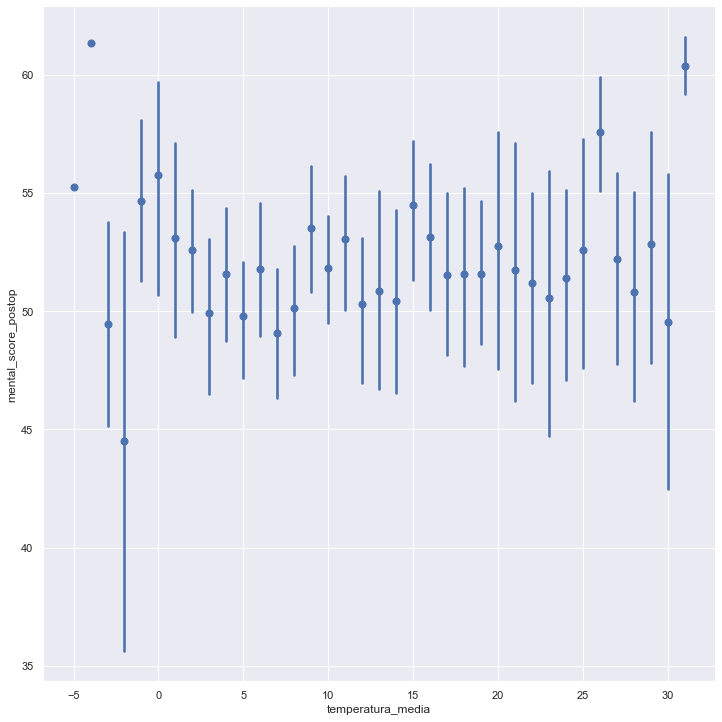

In [26]:

sns.lmplot(y = 'mental_score_postop', x = 'temperatura_media', data=df1, fit_reg=False, height=10, x_estimator=np.mean, truncate=True)

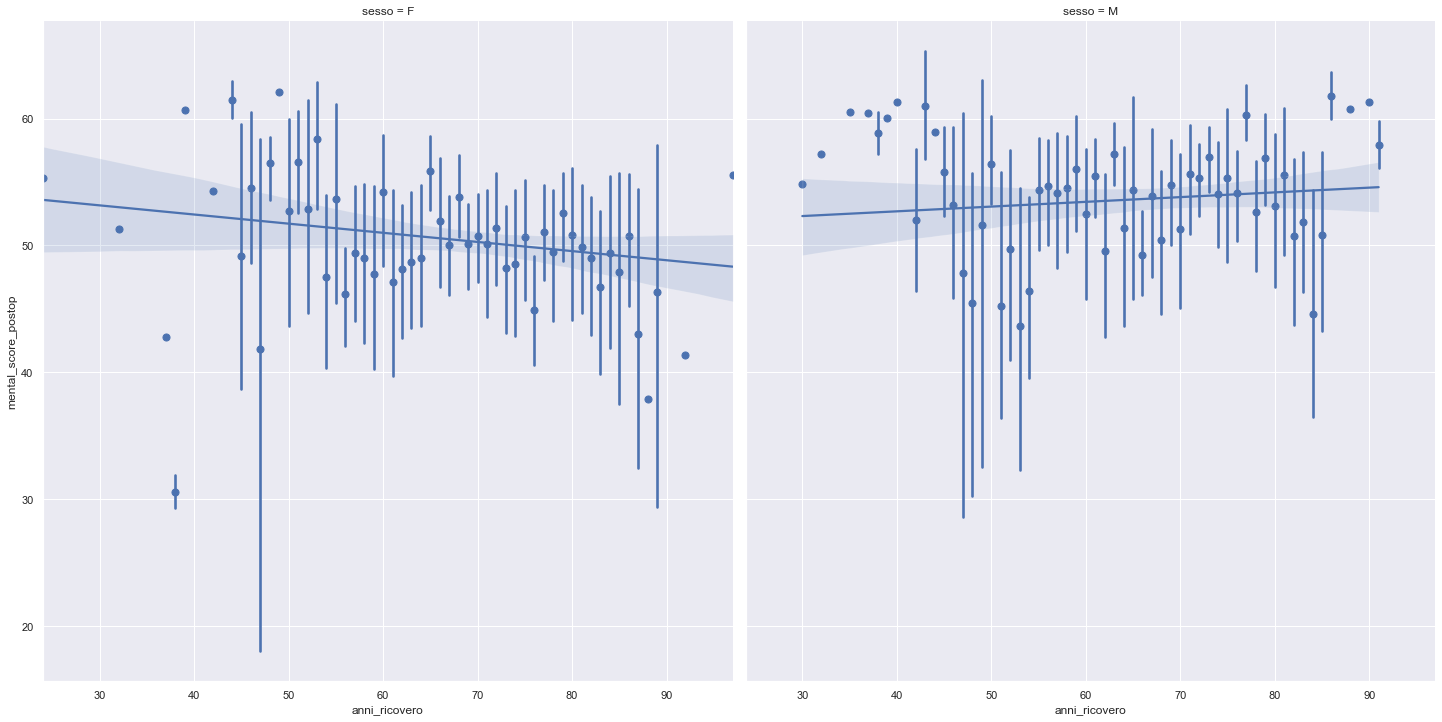

In [36]:
sns.lmplot(y = 'mental_score_postop', x = 'anni_ricovero', col = 'sesso', data=df1, fit_reg=True, height=10, x_estimator=np.mean, truncate=True)

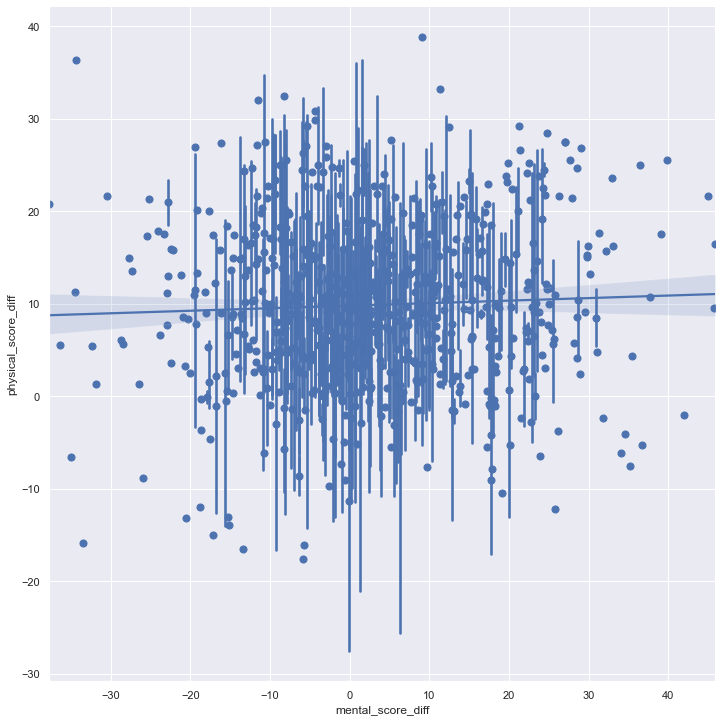

In [55]:
sns.lmplot(y = 'physical_score_diff', x = 'mental_score_diff', data=df1, fit_reg=True, height=10, x_estimator=np.mean, truncate=True)

Differenza media preop_postop di mental score (con sd), in funzione del sesso e della presenza o meno di natural_light 

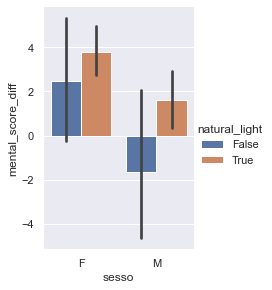

In [63]:
sns.catplot(x="sesso", y="mental_score_diff",
            hue="natural_light",
            data=df1, kind="bar", ci = 'sd',
            height=4, aspect=.7);

In [53]:
df1[(df1['HI > 27'] == True) & (df1['sesso'] == 'F') & (df1['natural_light'] == False)]['mental_score_diff'].mean()

1.7750000000000004

<AxesSubplot:xlabel='mental_score_postop', ylabel='physical_score_postop'>

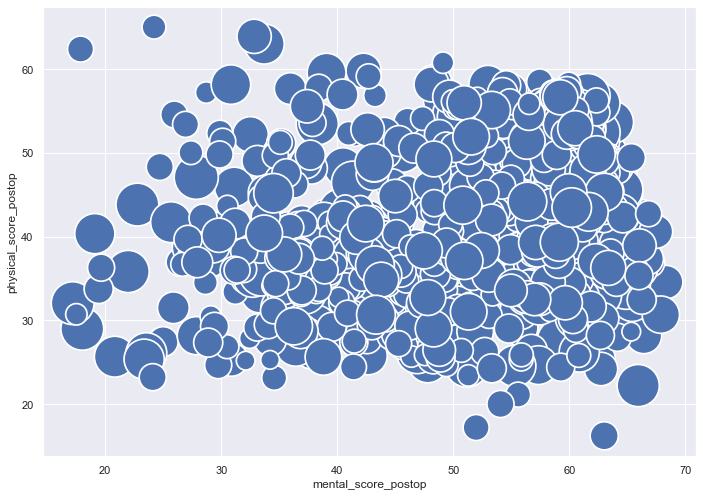

In [65]:
sns.scatterplot(data=df1, x="mental_score_postop", y="physical_score_postop", size="temperatura_media", legend=False, sizes=(20, 2000))


In [ ]:
plt.style.use('classic')
fig = plt.figure()
ax = plt.axes()
plt.xlim(0,100)
plt.ylim(0,100)
plt.hexbin(data=df1, x="physical_score_preop", y="mental_score_preop", gridsize=30, cmap="Blues", alpha=1)
plt.xlabel('Physical Score')
plt.ylabel('Mental Score')
plt.hexbin(data=df1, x="physical_score_postop", y="mental_score_postop", gridsize=30, cmap="Reds", alpha=0.8);